In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
data = pd.read_csv("E:\Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data1 = data.drop(['area_type','availability','society'],axis ='columns')
data1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
data1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
data1['balcony'] = data1['balcony'].fillna(0)

In [8]:
data1['bath'].replace(np.NaN,data1['bath'].median(),inplace=True)

In [9]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [10]:
data2 = data1.dropna()

In [11]:
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_10180\747557919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
data3 = data2.drop(['size'],axis='columns')
data3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [15]:
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
data3[data3.bhk>10]

,location,total_sqft,bath,balcony,price,bhk
459,1 Giri Nagar,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,0.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,0.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,0.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,3.0,150.0,11
4684,Munnekollal,2400,40.0,0.0,660.0,43
4916,1Channasandra,1250,15.0,0.0,125.0,14
6533,Mysore Road,2232,6.0,2.0,300.0,12
7979,1 Immadihalli,6000,12.0,0.0,150.0,11


In [17]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
data3[~data3['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,0.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,0.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2


In [20]:
def convert_sqft(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_sqft)

In [22]:
data4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
len(data4.location.unique())

1304

In [24]:
data5 = data4.copy()

In [25]:
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1052

In [27]:
location_stats_less_than_ten = location_stats[location_stats<=10]
location_stats_less_than_ten

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_stats_less_than_ten else x)

In [29]:
len(data5.location.unique())

242

In [30]:
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']

In [31]:
data5.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,0.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,0.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,0.0,370.00,6,36274.509804


In [32]:
data5[data5.total_sqft/data5.bhk<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000


In [33]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(12559, 7)

In [34]:
data6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out

In [36]:
data7 = remove_pps_outliers(data6)
data7.shape

(10286, 7)

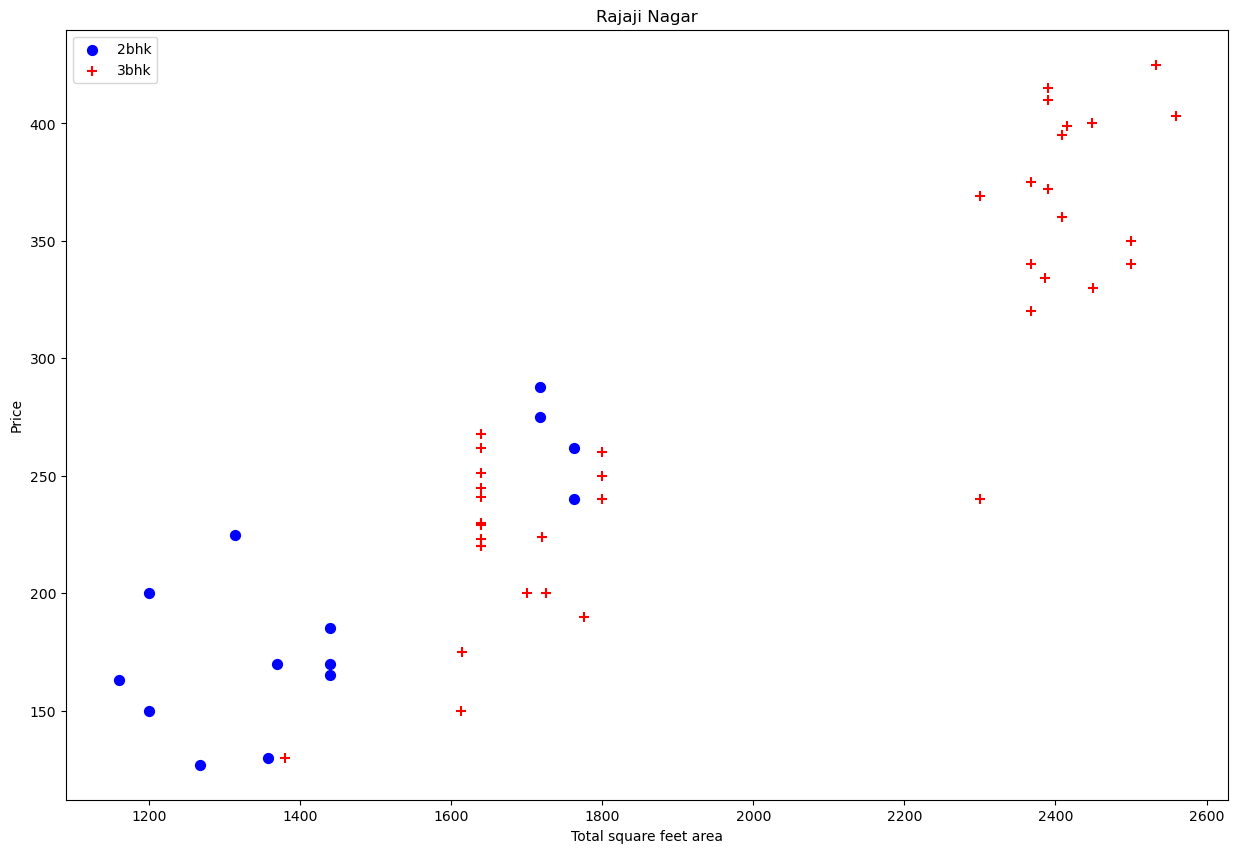

In [37]:
def scatter_plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, marker='+',color='red', label='3bhk',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot(data7, 'Rajaji Nagar')

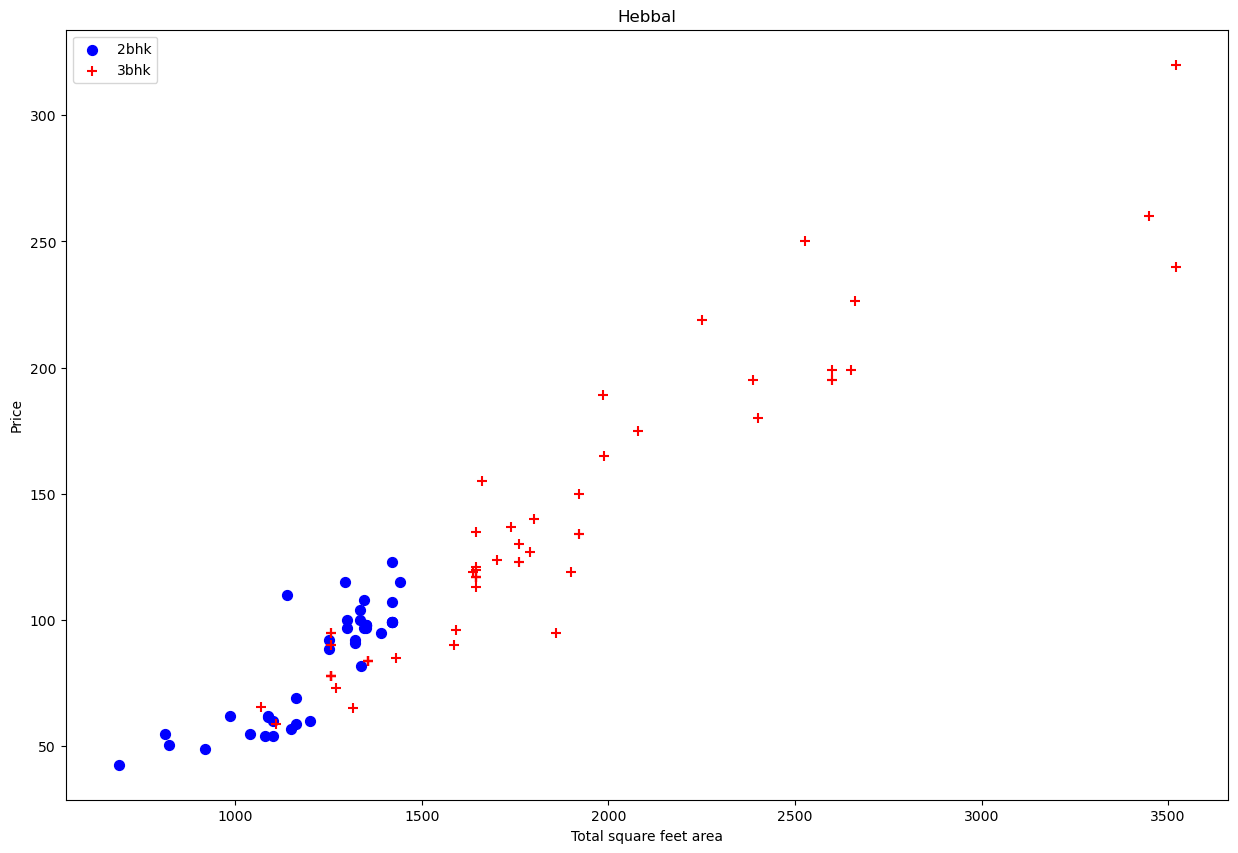

In [38]:
scatter_plot(data7, 'Hebbal')

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [40]:
data8 = remove_bhk_outliers(data7)
data8.shape

(7353, 7)

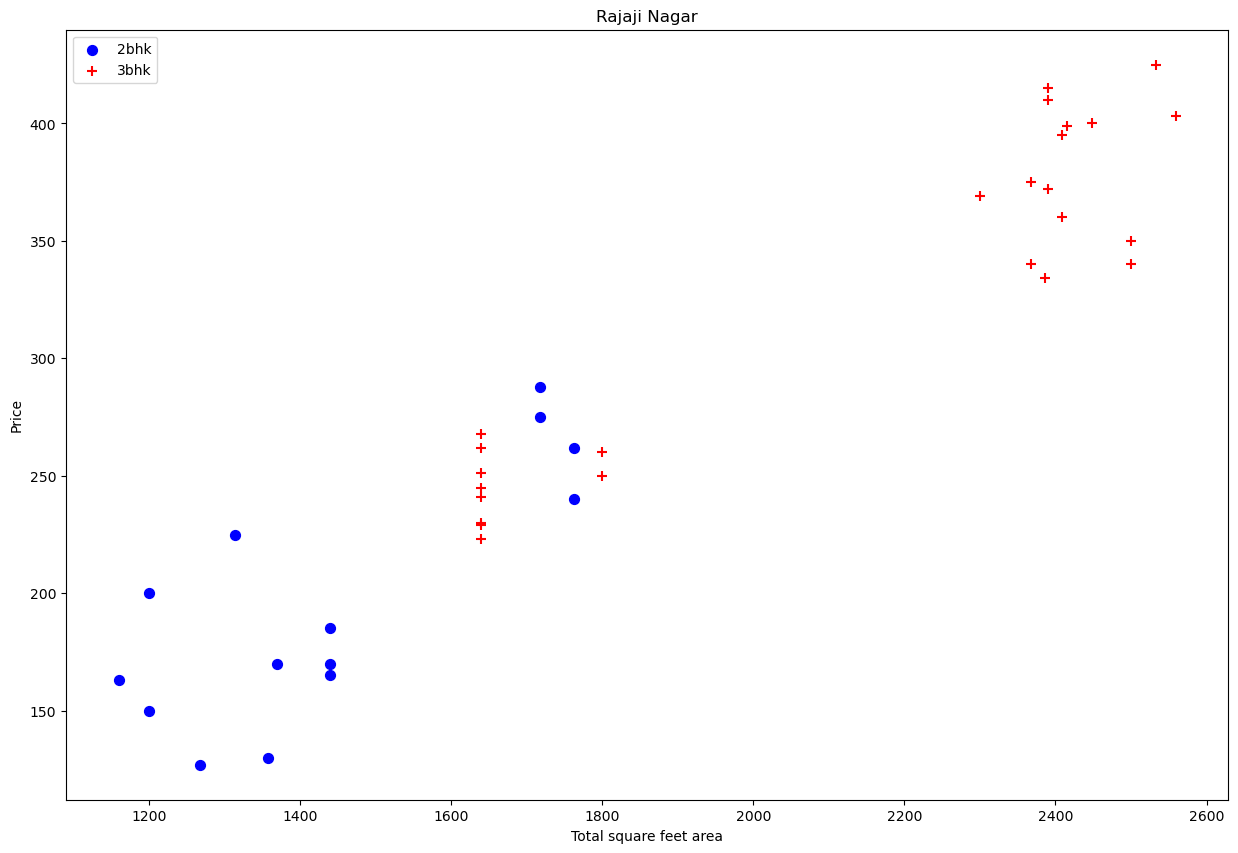

In [41]:
scatter_plot(data8,"Rajaji Nagar")

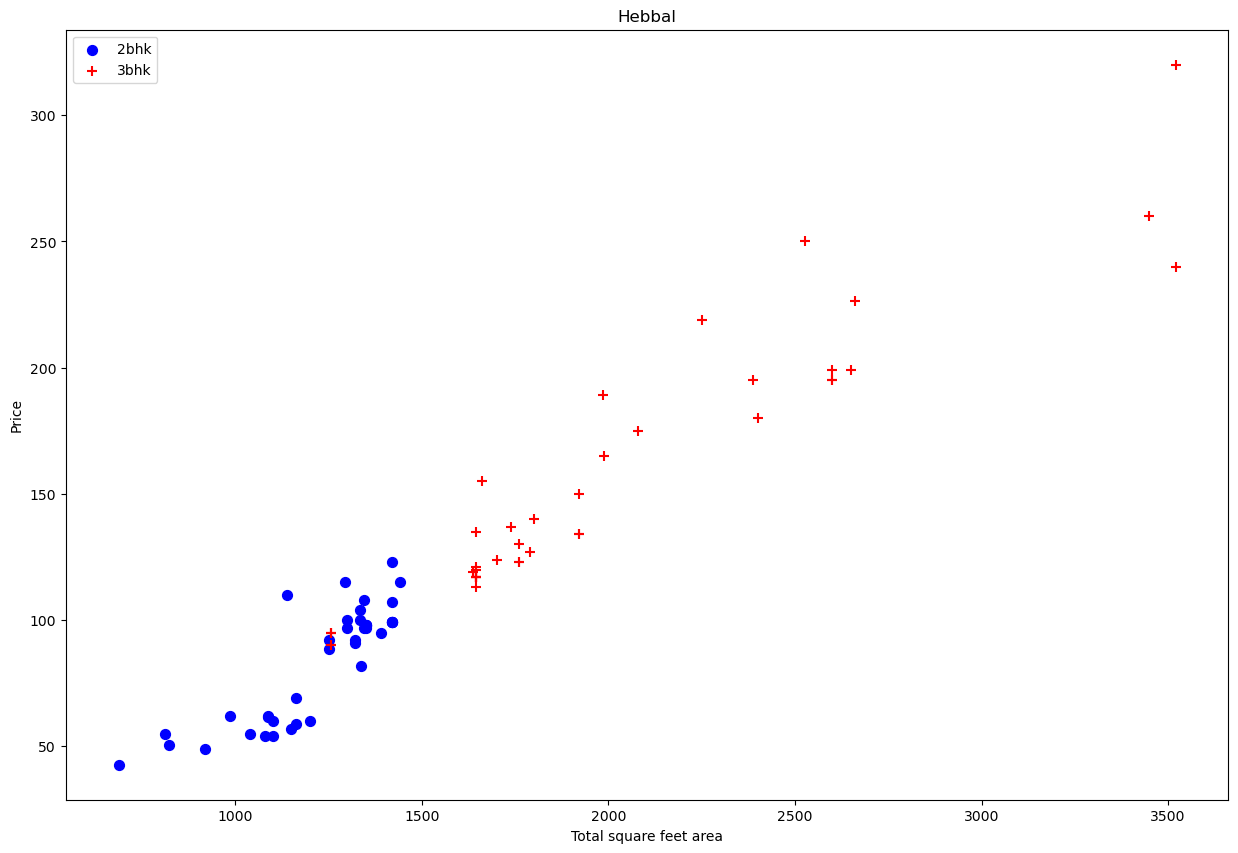

In [42]:
scatter_plot(data8,"Hebbal")

Text(0, 0.5, 'Count')

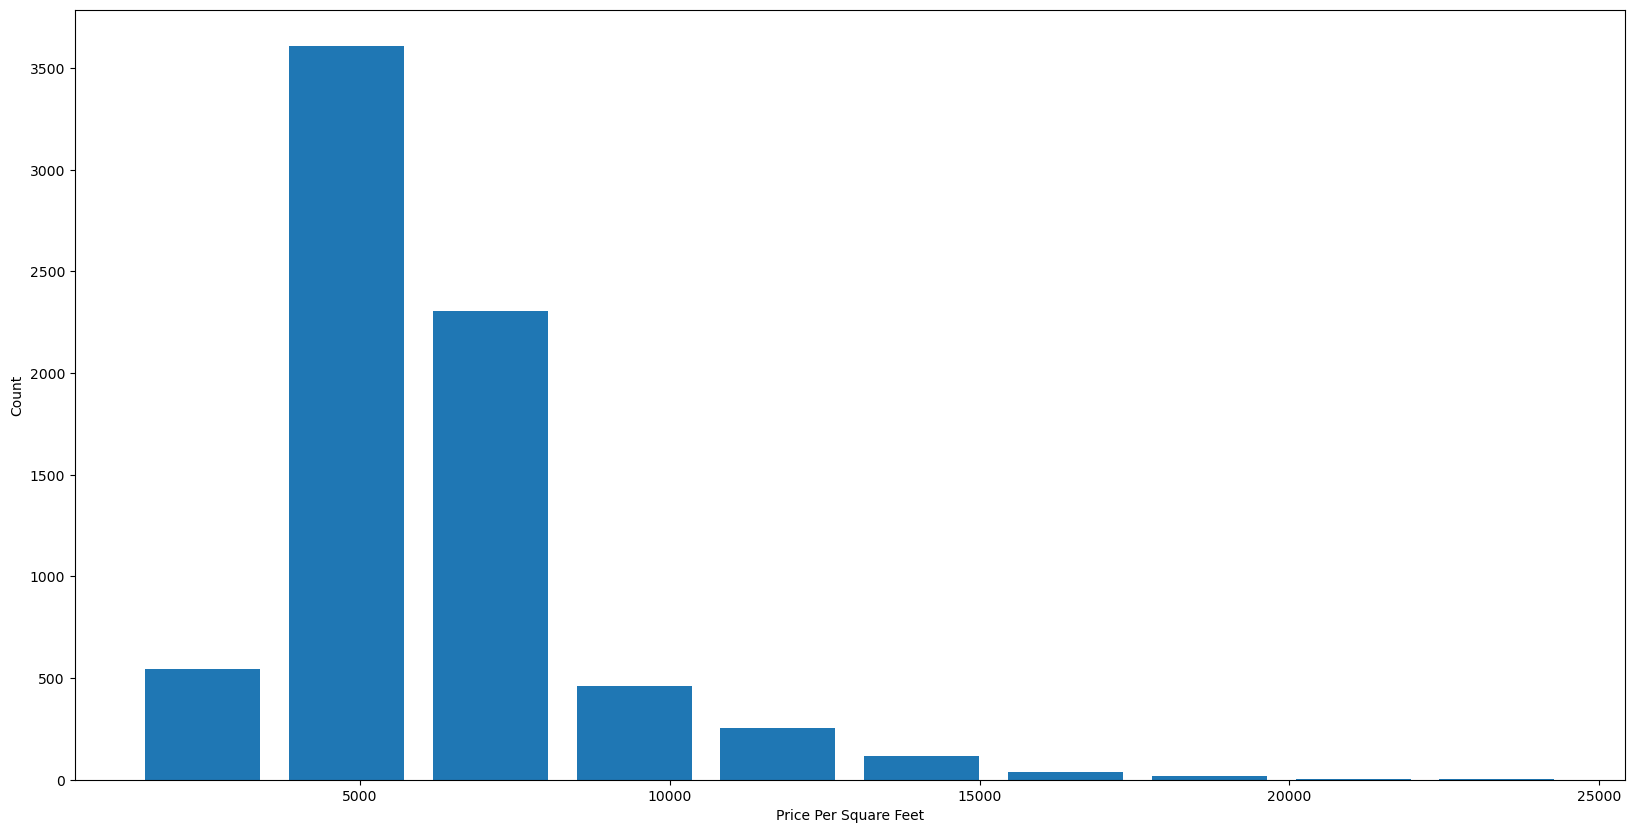

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
data8[data8.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,0.0,160.0,10,4000.000000
8530,other,12000.0,12.0,0.0,525.0,10,4375.000000
8619,other,10000.0,16.0,0.0,550.0,16,5500.000000
9352,other,6000.0,12.0,0.0,150.0,11,2500.000000
9683,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

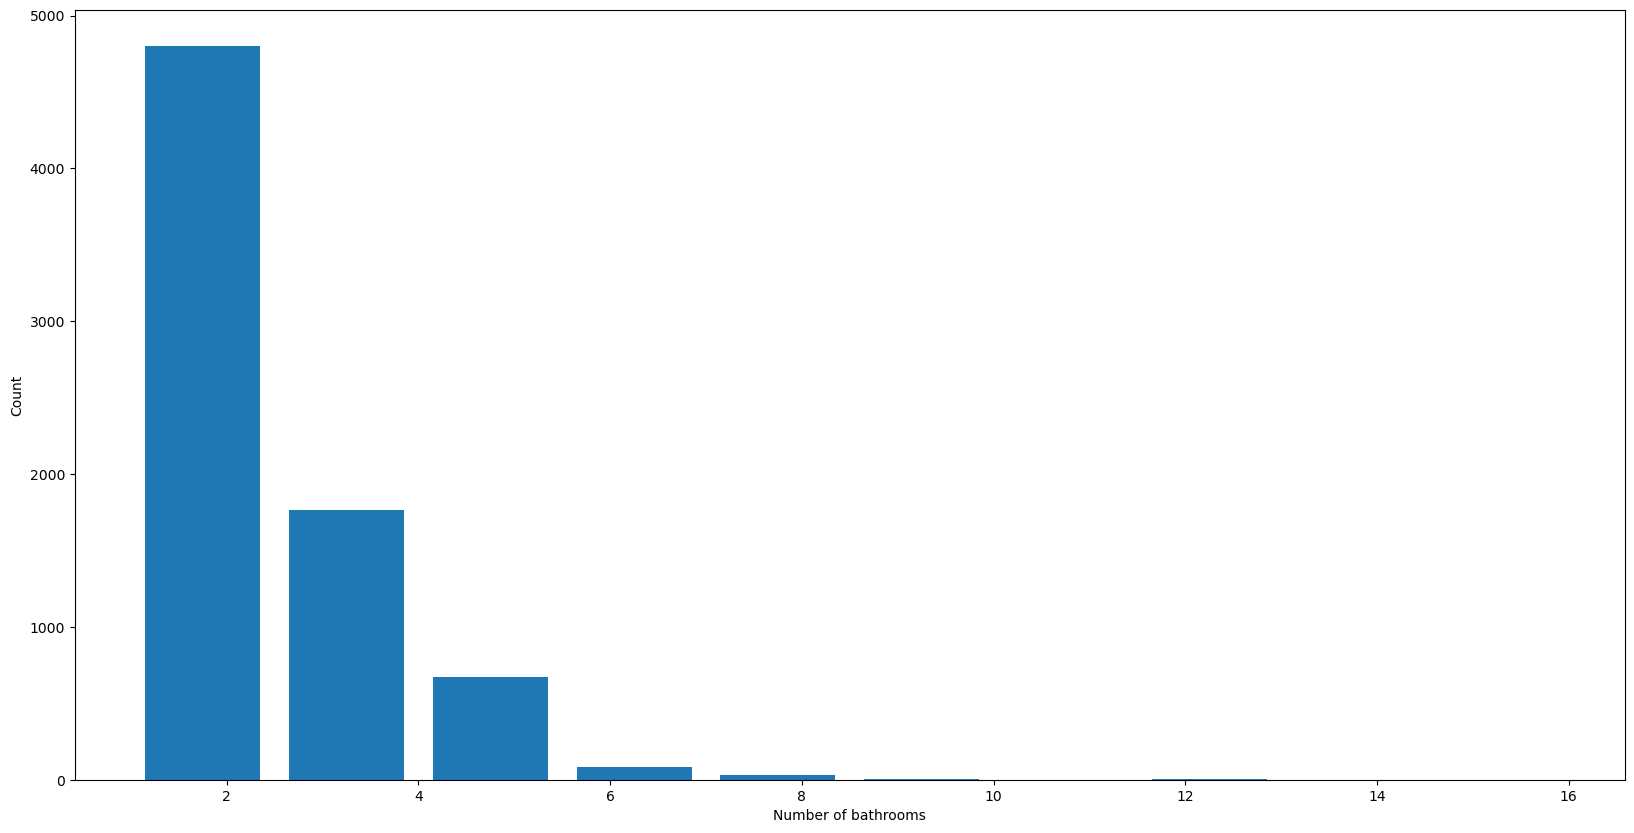

In [46]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
data8[data8.bath>data8.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Nagasandra,7000.0,8.0,0.0,450.0,4,6428.571429
6748,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8455,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [48]:
data9 = data8[data8.bath<data8.bhk+2]
data9.shape

(7275, 7)

In [49]:
data10 = data9.drop(['price_per_sqft'],axis = 'columns')
data10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [50]:
dummi = pd.get_dummies(data10.location,dtype=int)
dummi.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data11 = pd.concat([data10,dummi.drop('other',axis='columns')],axis='columns')
data11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data12 = data11.drop('location',axis='columns')
data12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data12.shape

(7275, 246)

In [54]:
X = data12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = data12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [56]:
len(y)

7275

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8301473978734959

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80742205, 0.77146909, 0.86466358, 0.83568424, 0.81862832])

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

E:\GOOGLE ANALYTICAL CERTIFICATE\ananconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "E:\GOOGLE ANALYTICAL CERTIFICATE\ananconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\GOOGLE ANALYTICAL CERTIFICATE\ananconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "E:\GOOGLE ANALYTICAL CERTIFICATE\ananconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.819573,{'positive': False}
1,lasso,0.679890,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.677128,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [69]:
def predict_price(location,sqft,bath,bhk,balcony):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 0)

E:\GOOGLE ANALYTICAL CERTIFICATE\ananconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.98199085047348

In [71]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))